**OpenViSUS: read from a remote dataset**

To execute this jupyter notebook have to install: OpenViSUS, numpy, matplotlib, ipyvolume

pip3 install numpy matplotlib ipyvolume

You can do it with pip3 (which uses python3):
pip3 install OpenVisus

If the installation of OpenVisus via pip does not work you have to build it and install it yourself (see OpenViSUS README), or add your build directory to the PYTHONPATH, or in your program add it to the sys path before the import:
sys.path.append('/somepath_to_your/OpenVisus/build')


In [6]:
import sys

import gc
import sys
import math
import unittest
import string 
import unittest
import os
import matplotlib.pyplot as plt
import numpy

from OpenVisus     import *
from VisusKernelPy import *
from VisusIdxPy    import *
from VisusDbPy     import *

In [7]:
OpenVisus.check()

import non-gui OpenVisus libraries OK
import gui OpenVisus libraries OK


In [8]:
IdxModule.attach()

PythonEngine is working fine


In [9]:
dataset=Dataset_loadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1")
    
box=dataset.get().getBox()
access=dataset.get().createAccess()
field=dataset.get().getDefaultField()
MaxH=dataset.get().getBitmask().getMaxResolution()

In [10]:
print(box.toString(), field.name, field.dtype.toString())

0 2048 0 2048 0 2048 DATA uint8


In [11]:
slice_box=box.getZSlab(1024,1025);

query=QueryPtr(Query(dataset.get(),ord('r')))
query.get().position=Position(slice_box)
query.get().end_resolutions.push_back(28)
query.get().merge_mode=Query.InsertSamples

In [12]:
dataset.get().beginQuery(query)
print("num samples", query.get().nsamples.innerProduct())
dataset.get().executeQuery(access,query)

num samples 262144


True

**Test 2D plot**

In [13]:
# convert the query result to a numpy array
np_data = query.get().buffer.toNumPy()

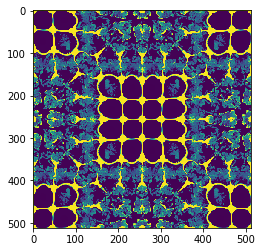

In [14]:
# plot the numpy array with matplotlib
plt.imshow(np_data)

In [15]:
print(np_data.shape)

(512, 512)


Making a 3D query for volume rendering

In [16]:
# select the entire dataset (2048), there are mant ways to write this selection box
slice_box=box.getZSlab(0,2048);

query=QueryPtr(Query(dataset.get(),ord('r')))
query.get().position=Position(slice_box)
query.get().end_resolutions.push_back(24)
query.get().merge_mode=Query.InsertSamples

In [17]:
# execute the query 
dataset.get().beginQuery(query)
print("num samples", query.get().nsamples.innerProduct())
dataset.get().executeQuery(access,query)

# convert the result of the query to a numpy array
np_data = query.get().buffer.toNumPy()
print(np_data.shape)

num samples 16777216
(256, 256, 256)


**Test volume rendering with iPyVolume**

In [18]:
import ipyvolume

In [19]:
ipyvolume.quickvolshow(np_data, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=255)

/usr/local/lib/python3.6/site-packages/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)
